In [133]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 

In [134]:
path = '/Applications/household-income-and-housing-cost-statistics-year-ended-june-2021-CSV 3/'
dataframe = pd.read_csv(path + 'inc_t1_datafile_2021.csv')
dataframe.head(6) 

,StatCode,MsCode,year,Estimate,SE,LowerCIB,UpperCIB,Flag
0,Q1,M001,2021,18631.0,324.0,18307.0,18955.0,
1,Q2,M001,2021,32363.0,168.0,32194.0,32531.0,
2,Q3,M001,2021,44027.0,161.0,43866.0,44189.0,
3,Q4,M001,2021,58102.0,255.0,57848.0,58357.0,
4,Q5,M001,2021,98748.0,1736.0,97012.0,100483.0,
5,Q6,M001,2021,50390.0,495.0,49895.0,50885.0,


In [135]:
frames =[]
all_length =[]
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result =pd.concat(frames)
        length_1month = len(df1.index)
        all_length.append(length_1month)
df =result
df.to_csv('annualinc_t1_datafile_2021.csv', index =False  )

In [136]:
print (sum(all_length))

3266


In [137]:
df['Month']=df['UpperCIB'].str.slice()
df.head()

,StatCode,MsCode,year,Estimate,SE,LowerCIB,UpperCIB,Flag,ExpCode,Year,RSE,EstCode,QuintCode,PdCode,IncCode,RegCode,HdCode,PerCode,DwCode,Month
0,Q1,M001,2021.0,9311.0,449.0,8861.0,9760.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q2,M001,2021.0,23786.0,125.0,23661.0,23911.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q3,M001,2021.0,34190.0,172.0,34017.0,34362.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q4,M001,2021.0,46948.0,259.0,46689.0,47207.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q5,M001,2021.0,85931.0,1596.0,84335.0,87527.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
print(set(df['Month']))

{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '83.7', '12.7', '97.6', '37.3', '27.3', '21.5', '39', '480.4', '53529', '20.5', '40020', '-3.3', '38848', '15185', '85.5', '5.7', '225.6', nan, '44.1', nan, nan, nan, '3.9', '73.3', nan, '114.4', '43090', '859.3', '336.5', '4280', '29.8', '53.4', '57.4', '45003', '64.5', '32.1', '25.9', '916.1', '42607', '188.4', '44421', '113', '1.1', '62.4', '342.7', '8', '63.1', '10.5', '46.2', '107.8', '46897', '49914', '33.3', '351', '48.9', '274.2', '269.5', '841.4', '702.3', '28.3', '7.2', '66.8', '107.9', '6211', '-9.9', '112.6', '50647', '79.5', '4', '22.8', '146.6', '15.7', '90', '35313', '35.4', '354.1', '257.8', '38.2', '220.1', '15.6', '412.7', '1813', '54431', '23.1', '252.3', '38861', '45339', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, '81.7', '355.4', '8.1', '16.8', '74.5', '18.8', '65.9', '99.9', '1516.8', '338.8', '2.8', '56243', '417.7', '18.2', '455.9', '945.7', '70.3', '56.2', '25.2', '91.6', '73.2', '21.9', '494.8', '4

In [139]:
df = df.dropna(how='all')
df.head

<bound method NDFrame.head of     StatCode MsCode    year Estimate      SE LowerCIB UpperCIB Flag ExpCode  \
0         Q1   M001  2021.0   9311.0   449.0   8861.0   9760.0          NaN   
1         Q2   M001  2021.0  23786.0   125.0  23661.0  23911.0          NaN   
2         Q3   M001  2021.0  34190.0   172.0  34017.0  34362.0          NaN   
3         Q4   M001  2021.0  46948.0   259.0  46689.0  47207.0          NaN   
4         Q5   M001  2021.0  85931.0  1596.0  84335.0  87527.0          NaN   
..       ...    ...     ...      ...     ...      ...      ...  ...     ...   
187      NaN    NaN     NaN     15.7     1.7     14.0     17.3  NaN     NaN   
188      NaN    NaN     NaN     22.0     4.1     17.9     26.1  NaN     NaN   
189      NaN    NaN     NaN      5.9     1.1      4.9      7.0  NaN     NaN   
190      NaN    NaN     NaN     12.4     2.6      9.8     15.0  NaN     NaN   
191      NaN    NaN     NaN      3.3     0.7      2.6      4.0  NaN     NaN   

       Year  RSE EstC

In [140]:
print(df['LowerCIB'].dtypes)
print(df['UpperCIB'].dtypes)

object
object


In [141]:
moving_colum = df.pop('SE')
df.insert(6, 'SE',moving_colum)
df.head()

,StatCode,MsCode,year,Estimate,LowerCIB,UpperCIB,SE,Flag,ExpCode,Year,RSE,EstCode,QuintCode,PdCode,IncCode,RegCode,HdCode,PerCode,DwCode,Month
0,Q1,M001,2021.0,9311.0,8861.0,9760.0,449.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q2,M001,2021.0,23786.0,23661.0,23911.0,125.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q3,M001,2021.0,34190.0,34017.0,34362.0,172.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q4,M001,2021.0,46948.0,46689.0,47207.0,259.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q5,M001,2021.0,85931.0,84335.0,87527.0,1596.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
dataframe.groupby('MsCode').sum()['SE']

MsCode
M001     6807.0
M002     6415.0
M003     4707.0
M004     4561.0
M005    12097.0
M006      958.0
M007        7.9
M008        5.3
M009        0.0
M010        1.2
M011        0.8
M012        1.2
M013        0.8
Name: SE, dtype: float64

In [143]:
SE_value = dataframe.groupby('MsCode').sum()['SE']
SE_value.max()

12097.0

ValueError: shape mismatch: objects cannot be broadcast to a single shape

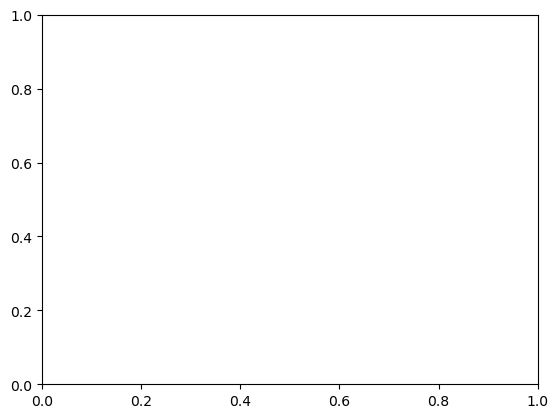

In [144]:
MsCode = range(1,13)
plt.bar(x=MsCode, height=SE_value)
plt.xticks(MsCode)
plt.xlabel('MsCode')
plt.ylabel('SE')
plt.show()

In [ ]:
df.head()

,StatCode,MsCode,year,Estimate,LowerCIB,UpperCIB,SE,Flag,ExpCode,Year,RSE,EstCode,QuintCode,PdCode,IncCode,RegCode,HdCode,PerCode,DwCode,Month
0,Q1,M001,2021.0,9311.0,8861.0,9760.0,449.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q2,M001,2021.0,23786.0,23661.0,23911.0,125.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q3,M001,2021.0,34190.0,34017.0,34362.0,172.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q4,M001,2021.0,46948.0,46689.0,47207.0,259.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q5,M001,2021.0,85931.0,84335.0,87527.0,1596.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['SE'] =pd.to_numeric(df['SE'])

ValueError: Unable to parse string " " at position 1425

In [ ]:
df_dup = df[df['MsCode'].duplicated(keep=False )]
df_dup.head()

,StatCode,MsCode,year,Estimate,LowerCIB,UpperCIB,SE,Flag,ExpCode,Year,RSE,EstCode,QuintCode,PdCode,IncCode,RegCode,HdCode,PerCode,DwCode,Month
0,Q1,M001,2021.0,9311.0,8861.0,9760.0,449.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q2,M001,2021.0,23786.0,23661.0,23911.0,125.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q3,M001,2021.0,34190.0,34017.0,34362.0,172.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q4,M001,2021.0,46948.0,46689.0,47207.0,259.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q5,M001,2021.0,85931.0,84335.0,87527.0,1596.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_dup = df_dup[['MsCode','SE']].drop_duplicates

In [146]:
df_dup['SE'].value_counts()

TypeError: 'method' object is not subscriptable